In [1]:
import json
from functools import cache, cached_property
from pathlib import Path
import tempfile

import cadquery as cq
import pyvista as pv
import numpy as np
import splinecloud_scipy as sc
from cquav.turbofan import AirfoilSection, Turbofan, get_refined_airfoils_collection

pv.start_xvfb()

## Generating temprorary file for the model visualisation

In [2]:
def generate_temp_file(model, file_format = "stl", tessellation = 1e-5):
    """Generates a temporary file with the specified STL or STEP format."""
    if file_format.lower() == "stl":
        file_suffix = ".stl"
        export_type = cq.exporters.ExportTypes.STL

    elif file_format.lower() == "step":
        file_suffix = ".step"
        export_type = cq.exporters.ExportTypes.STEP
    else:
        raise ValueError(f"Unsupported file format: {file_format}")

    with tempfile.NamedTemporaryFile(delete=False, suffix=file_suffix) as tmpfile:
        cq.exporters.export(model, tmpfile.name, exportType=export_type, tolerance=tessellation)
        return tmpfile.name

## Get airfoils collection

In [3]:
airfoils = get_refined_airfoils_collection()

## Specify sections

In [4]:
sections = [
    AirfoilSection(airfoils["ONERA NACA CAMBRE AIRFOIL (ncambre-il)"], 0.6, 0, -20),
    AirfoilSection(airfoils["NACA 0012-64 a=0.8 c(li)=0.2 (naca001264a08cli02-il)"], 1.0, 2, -12),
    AirfoilSection(airfoils["NACA 6-H-15 AIRFOIL (n6h15-il)"], 0.3, 4, -3),
]
sections

## Create the turbofan model

In [5]:
turbofan = Turbofan(
    sections = sections,
    vanes_count = 3,
    center_hole_diameter = 1,
    hub_diameter = 2    
)
turbofan

## Visualise the model

In [6]:
mesh = pv.read(generate_temp_file(turbofan.build_turbofan()))
plotter = pv.Plotter()
plotter.add_mesh(mesh)

Actor (0x7fbeeb924160)
  Center:                     (-0.07493042945861816, -0.06578300893306732, 1.0757230520248413)
  Pickable:                   True
  Position:                   (0.0, 0.0, 0.0)
  Scale:                      (1.0, 1.0, 1.0)
  Visible:                    True
  X Bounds                    -4.329E+00, 4.179E+00
  Y Bounds                    -2.631E-01, 1.316E-01
  Z Bounds                    -2.674E+00, 4.826E+00
  User matrix:                Identity
  Has mapper:                 True

Property (0x7fbeeb924340)
  Ambient:                     0.0
  Ambient color:               Color(name='lightblue', hex='#add8e6ff', opacity=255)
  Anisotropy:                  0.0
  Color:                       Color(name='lightblue', hex='#add8e6ff', opacity=255)
  Culling:                     "none"
  Diffuse:                     1.0
  Diffuse color:               Color(name='lightblue', hex='#add8e6ff', opacity=255)
  Edge color:                  Color(name='black', hex='#000000ff

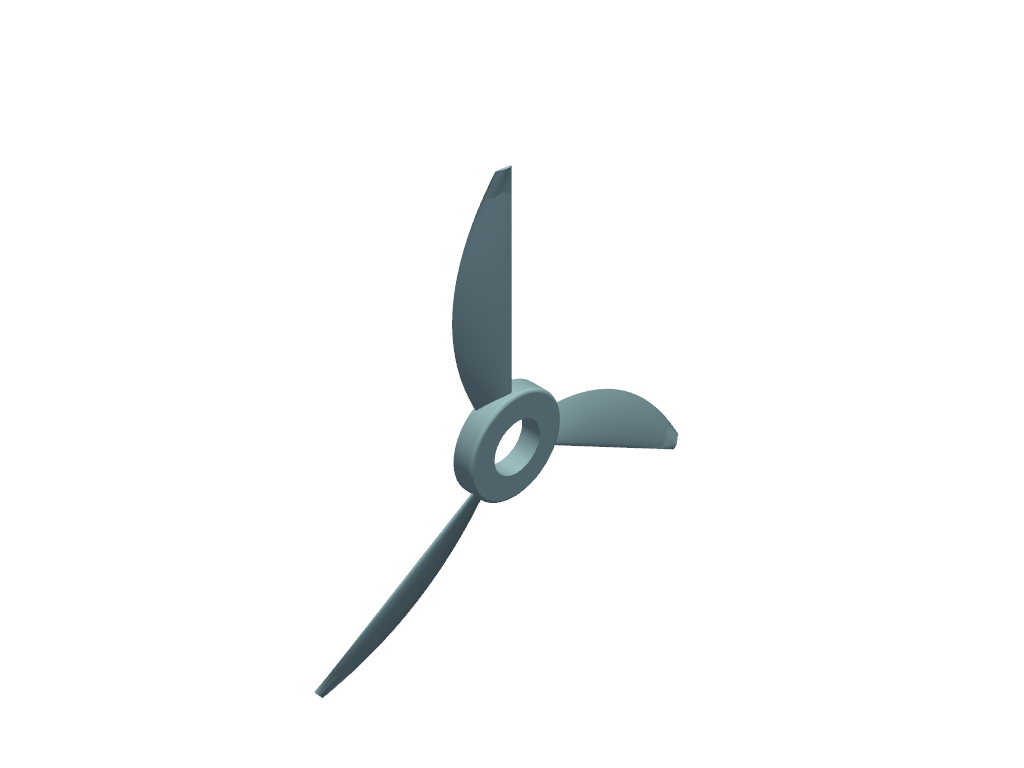

In [7]:
plotter.show()